# Project.2

# Titanic survived Project

In [85]:
# Importing the required modules for data analysis and data visualization
import numpy as np 
import pandas as pd
import re
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [86]:
data = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
# Learning about the size and datatypes of attributes of 'data' dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [88]:
# Learning about the columns
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [89]:
# Printing summary statistics
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [90]:
# To view categorical features
data.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [91]:
# Finding the percentage of missing values in data
data.isnull().sum()/ len(data) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [92]:
# Since cabin column has a high percentage of missing values, it may be dropped.

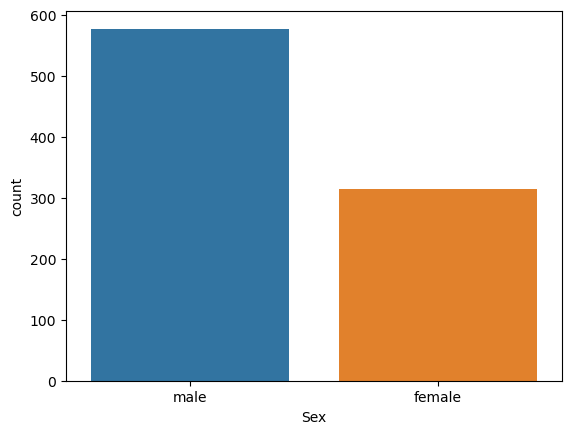

Sex
male      577
female    314
Name: count, dtype: int64

In [93]:
# Counting the number of males and females
sns.countplot(x='Sex', data=data)
plt.show()

# Display the value counts
data['Sex'].value_counts()

,Sex,Survived
0,female,0.742038
1,male,0.188908


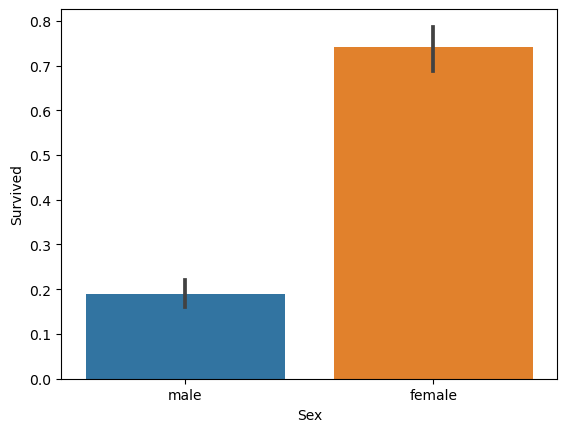

In [94]:
# Comparing the Sex feature against Survived
sns.barplot(x='Sex',y='Survived',data=data)
data.groupby('Sex',as_index=False).Survived.mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


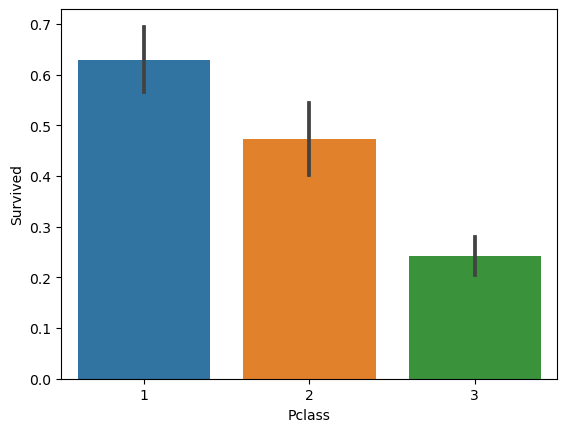

In [95]:
# Comparing the Pclass feature against Survived
sns.barplot(x='Pclass',y='Survived',data=data)
data[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


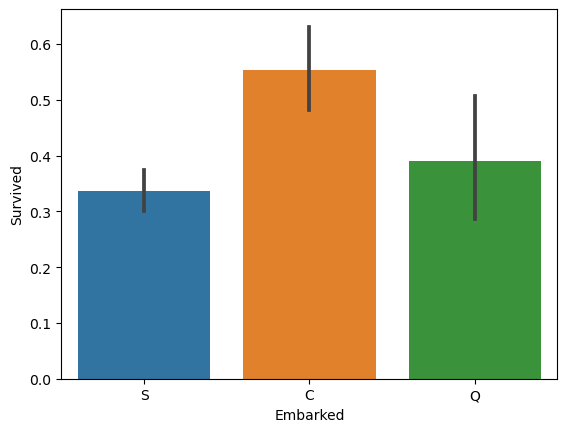

In [97]:
# Comparing the Embarked feature against Survived
sns.barplot(x='Embarked',y='Survived',data=data)
data[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


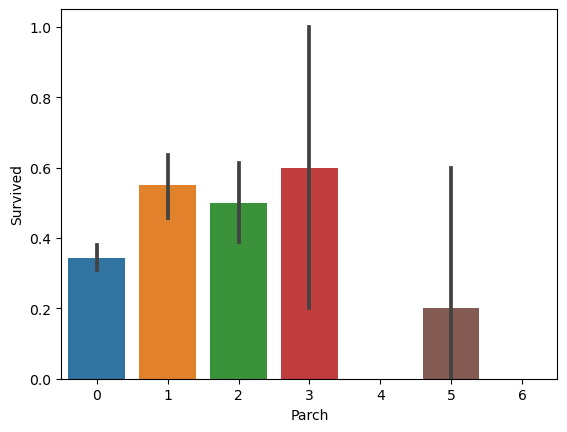

In [98]:
# Comparing the Number of Children feature against Survived
sns.barplot(x='Parch',y='Survived',data=data)
data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


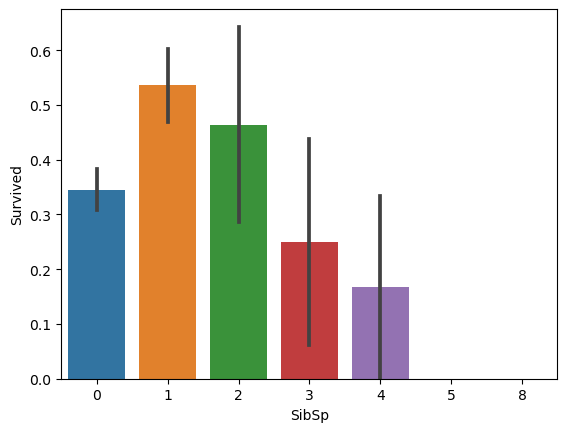

In [99]:
# Comparing the Number of Siblings/Spouse feature against Survived
sns.barplot(x='SibSp',y='Survived',data=data)
data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

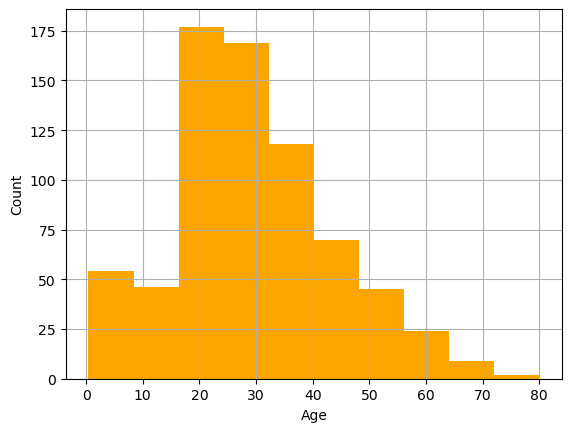

The Standard Deviation age of passengers is : 14
The Median age of passengers is : 28


In [100]:
# Plotting a histogram of the ages
data.Age.hist(bins=10,color='orange')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
print("The Standard Deviation age of passengers is :", int(data.Age.std()))
print("The Median age of passengers is :", int(data.Age.median()))

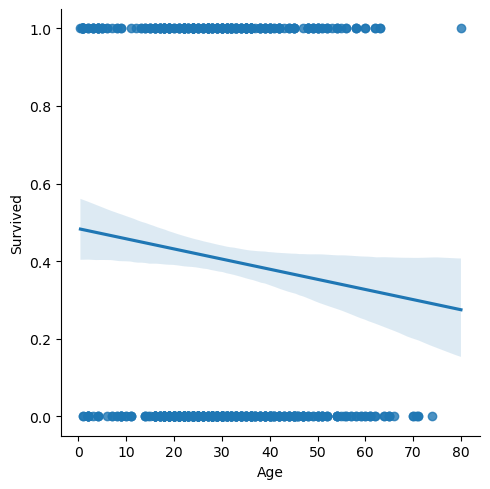

In [101]:
# Younger individuals are more likely to survive
sns.lmplot(x='Age',y='Survived',data=data,palette='Set1')

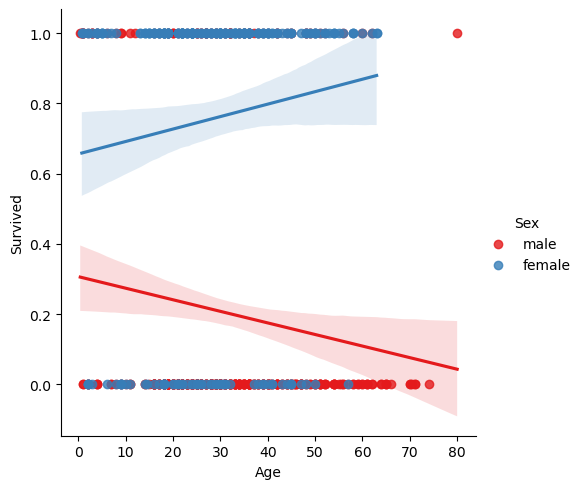

In [102]:
# Does Sex have effect on Survival
sns.lmplot(x='Age',y='Survived',data=data,hue='Sex',palette='Set1')

,Sex,Age
0,female,27.0
1,male,29.0


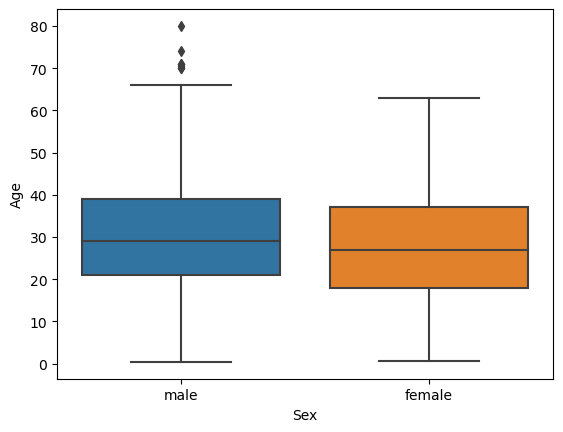

In [103]:
# Checking for outliers in Age data
sns.boxplot(x='Sex',y='Age',data=data)

# Getting the median age according to Sex
data.groupby('Sex',as_index=False)['Age'].median()

Mean value of Fare is : 32.204207968574636
Median value of Fare is : 14.4542


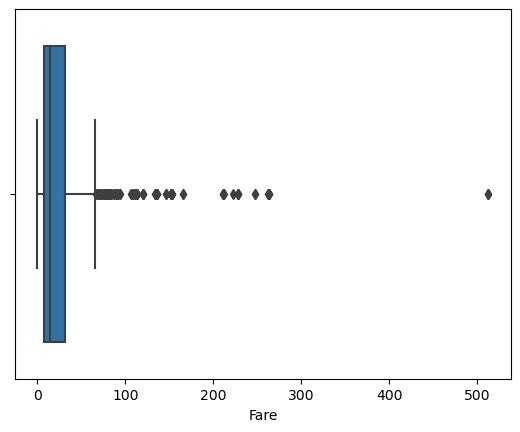

In [104]:
# Plotting the Fare column
sns.boxplot(x="Fare",data=data)

# Checking the mean and median
print("Mean value of Fare is :",data.Fare.mean())
print("Median value of Fare is :",data.Fare.median())

# Data Cleaning

In [105]:
# Dropping columns which are not required
drop_list=['Cabin','Ticket']

data = data.drop(drop_list,axis=1)


In [106]:
# Filling the missing Embarked values in train and test datasets with the majority ('S')
data.Embarked.fillna('S',inplace=True)


# Filling the missing values in the Age column in train and test datasets with the median age (28)
data.Age.fillna(28, inplace=True)


# Filling the missing values in the Fare column in the train and test datasets with the median fare
data.Fare.fillna(data.Fare.median(), inplace=True)


# Feature Engineering

In [107]:
# Combining the train and test dataframes to work with them simultaneously
combined = [data]

<Axes: xlabel='count', ylabel='Title'>

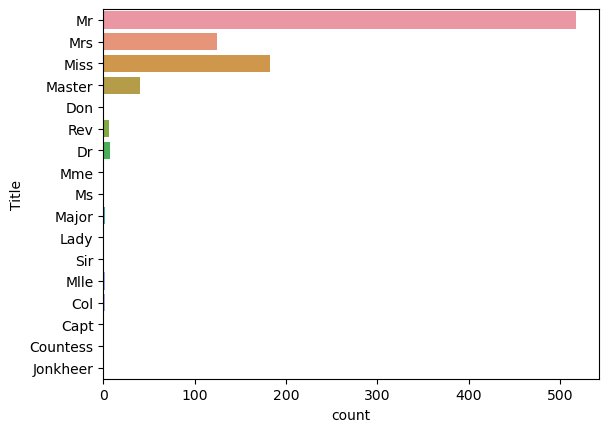

In [108]:
# Extracting the various titles in Names column
for dataset in combined:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# Plotting the various titles extracted    
sns.countplot(y='Title',data=data) 

In [109]:
# Refining the title feature by merging some rare titles and correcting misspelt titles
for dataset in combined:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Special')

    dataset['Title'] = dataset['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})
    
data.groupby('Title',as_index=False)['Survived'].mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Special,0.347826
2,Mr,0.156673


<Axes: xlabel='count', ylabel='Title'>

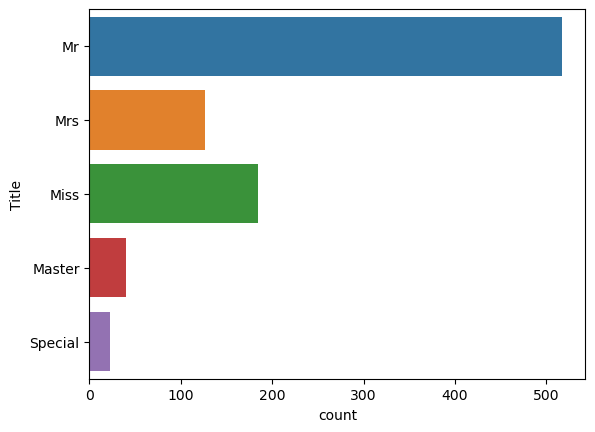

In [110]:
# Distribution of the title feature
sns.countplot(y='Title',data=data)

In [111]:
# Mapping the title names to numeric values
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Special": 5}
for dataset in combined:
    dataset['Title'] = dataset.Title.map(title_mapping)
    dataset['Title'] = dataset.Title.fillna(0)

In [112]:
# Creating a new feature IsAlone from the SibSp and Parch columns (because being alone on the Titanic is evidently a huge disadvantage)
for dataset in combined:
    dataset["Family"] = dataset['SibSp'] + dataset['Parch']
    dataset["IsAlone"] = np.where(dataset["Family"] > 0, 0,1)
    dataset.drop('Family',axis=1,inplace=True)
    
data.head()  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1


In [113]:
# Dropping the Name,SibSP and Parch columns since they aren't necessary
for dataset in combined:
    dataset.drop(['SibSp','Parch','Name'],axis=1,inplace=True)  

In [114]:
# Creating another feature if the passenger is a child, since younger people had greater chances of survival
for dataset in combined:
    dataset["IsMinor"] = np.where(dataset["Age"] < 15, 1, 0)

In [115]:
# Creating another feature if the passenger is an old woman, since older women had greater chances of survival
data['Old_Female'] = (data['Age']>50)&(data['Sex']=='female')
data['Old_Female'] = data['Old_Female'].astype(int)



In [116]:
# Converting categorical variables into numerical ones
train2 = pd.get_dummies(data,columns=['Pclass','Sex','Embarked'],drop_first=True)
train2.head()

,PassengerId,Survived,Age,Fare,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,22.0,7.2500,1,0,0,0,False,True,True,False,True
1,2,1,38.0,71.2833,3,0,0,0,False,False,False,False,False
2,3,1,26.0,7.9250,2,1,0,0,False,True,False,False,True
3,4,1,35.0,53.1000,3,0,0,0,False,False,False,False,True
4,5,0,35.0,8.0500,1,1,0,0,False,True,True,False,True


In [117]:
# Creating Age and Fare bands
train2['AgeBands'] = pd.qcut(train2.Age,4,labels=False) 
 
train2['FareBand'] = pd.qcut(train2.Fare,7,labels=False)


In [118]:
# Dropping the Age and Fare columns
train2.drop(['Age','Fare'],axis=1,inplace=True)


In [119]:
train2.head()

,PassengerId,Survived,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeBands,FareBand
0,1,0,1,0,0,0,False,True,True,False,True,0,0
1,2,1,3,0,0,0,False,False,False,False,False,3,6
2,3,1,2,1,0,0,False,True,False,False,True,1,1
3,4,1,3,0,0,0,False,False,False,False,True,2,5
4,5,0,1,1,0,0,False,True,True,False,True,2,1


# Machine Learning

In [120]:
# Importing the required ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [121]:
# Splitting training data into X: features and Y: target
X = train2.drop("Survived",axis=1) 
Y = train2["Survived"]

# Splitting our training data again in train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=42)

In [122]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred, Y_test) * 100, 2)
acc_logreg

79.1

In [123]:
# K-fold cross validation for logistic Regression for greater accuracy
cv_scores = cross_val_score(logreg,X,Y,cv=5)
np.mean(cv_scores)*100

79.01387232439897

In [124]:
# Decision Tree Classifier

decisiontree = DecisionTreeClassifier()
dep = np.arange(1,10)
param_grid = {'max_depth' : dep}

clf_cv = GridSearchCV(decisiontree, param_grid=param_grid, cv=5)

clf_cv.fit(X, Y)
clf_cv.best_params_,clf_cv.best_score_*100
print('Best value of max_depth:',clf_cv.best_params_)
print('Best score:',clf_cv.best_score_*100)

Best value of max_depth: {'max_depth': 3}
Best score: 82.26539451384095


In [125]:
# Random Forest CLassifier

random_forest = RandomForestClassifier()
ne = np.arange(1,20)
param_grid = {'n_estimators' : ne}

rf_cv = GridSearchCV(random_forest, param_grid=param_grid, cv=5)

rf_cv.fit(X, Y)
print('Best value of n_estimators:',rf_cv.best_params_)
print('Best score:',rf_cv.best_score_*100)

Best value of n_estimators: {'n_estimators': 6}
Best score: 79.24172996045445


In [126]:
# Gradient Boosting Classifier

gbk = GradientBoostingClassifier()
ne = np.arange(1,20)
dep = np.arange(1,10)
param_grid = {'n_estimators' : ne,'max_depth' : dep}

gbk_cv = GridSearchCV(gbk, param_grid=param_grid, cv=5)

gbk_cv.fit(X, Y)
print('Best value of parameters:',gbk_cv.best_params_)
print('Best score:',gbk_cv.best_score_*100)

Best value of parameters: {'max_depth': 3, 'n_estimators': 8}
Best score: 82.04255853367648
